# CNN_UTK_Model for Age detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

age     ethnicity        gender
count  23705.000000  23705.000000  23705.000000
mean      33.300907      1.269226      0.477283
std       19.885708      1.345638      0.499494
min        1.000000      0.000000      0.000000
25%       23.000000      0.000000      0.000000
50%       29.000000      1.000000      0.000000
75%       45.000000      2.000000      1.000000
max      116.000000      4.000000      1.000000

In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  [129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...  
1  [164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....  
2  [67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....  
3  [193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...  
4  [202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...

### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

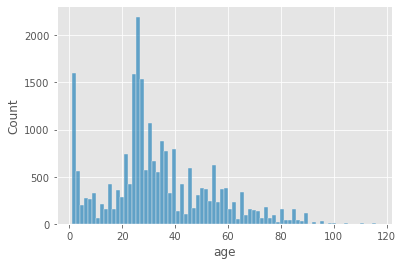

In [7]:
sns.histplot(data=df, x='age')

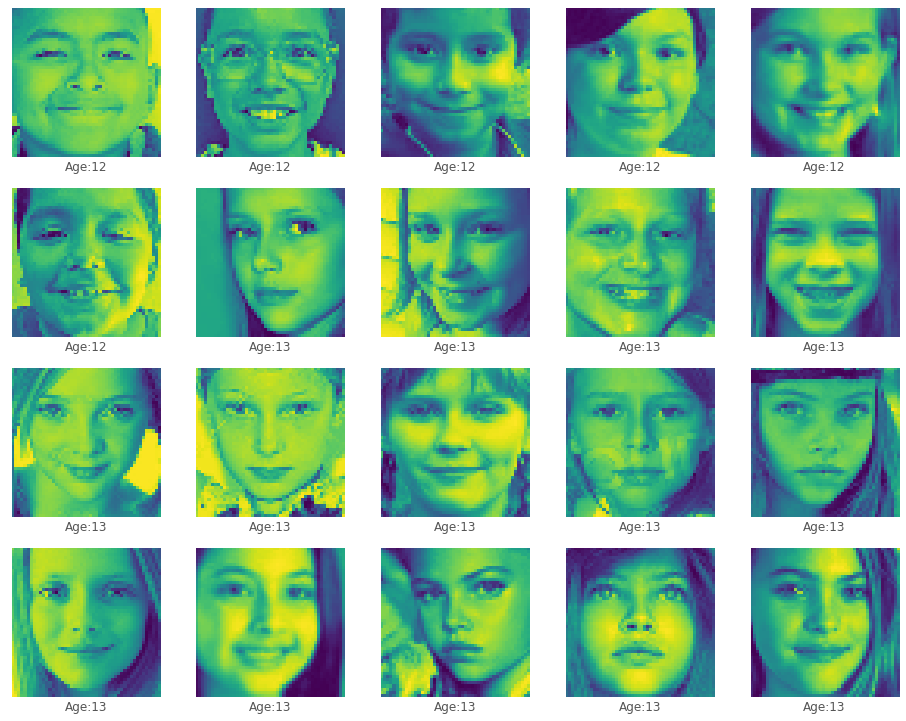

In [8]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [9]:
X = np.array(df['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)
y = df['age']

In [10]:
X[:5].shape

(5, 48, 48, 1)

In [11]:
y[:5].shape

(5,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(16, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                541760    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 541,985
Trainable params: 541,985
Non-trainable params: 0
_________________________________________________________________


In [15]:
filepath = 'checkpoints/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
258/260 [============================>.] - ETA: 0s - loss: 260.4212 - mae: 12.1357
Epoch 00001: val_loss improved from inf to 170.52010, saving model to checkpoints\my_best_model.epoch01-loss170.52.hdf5
260/260 [==============================] - 6s 24ms/step - loss: 260.1669 - mae: 12.1292 - val_loss: 170.5201 - val_mae: 10.1598
Epoch 2/100
258/260 [============================>.] - ETA: 0s - loss: 158.0694 - mae: 9.5383
Epoch 00002: val_loss improved from 170.52010 to 141.82776, saving model to checkpoints\my_best_model.epoch02-loss141.83.hdf5
260/260 [==============================] - 6s 24ms/step - loss: 157.8669 - mae: 9.5318 - val_loss: 141.8278 - val_mae: 9.1307
Epoch 3/100
258/260 [============================>.] - ETA: 0s - loss: 132.8038 - mae: 8.6574
Epoch 00003: val_loss improved from 141.82776 to 133.17189, saving model to checkpoints\my_best_model.epoch03-loss133.17.hdf5
260/260 [==============================] - 6s 24ms/step - loss: 132.6176 - mae: 8.6515 - va

Epoch 29/100
259/260 [============================>.] - ETA: 0s - loss: 23.3920 - mae: 3.6911
Epoch 00029: val_loss did not improve from 106.00620
260/260 [==============================] - 6s 25ms/step - loss: 23.4088 - mae: 3.6925 - val_loss: 123.0249 - val_mae: 8.0351
Epoch 30/100
259/260 [============================>.] - ETA: 0s - loss: 22.0769 - mae: 3.5873
Epoch 00030: val_loss did not improve from 106.00620
260/260 [==============================] - 7s 25ms/step - loss: 22.0703 - mae: 3.5869 - val_loss: 122.2153 - val_mae: 7.9883
Epoch 31/100
259/260 [============================>.] - ETA: 0s - loss: 20.6385 - mae: 3.4668
Epoch 00031: val_loss did not improve from 106.00620
260/260 [==============================] - 7s 26ms/step - loss: 20.6449 - mae: 3.4675 - val_loss: 124.6408 - val_mae: 8.1316
Epoch 32/100
259/260 [============================>.] - ETA: 0s - loss: 20.0067 - mae: 3.4034
Epoch 00032: val_loss did not improve from 106.00620
260/260 [============================

258/260 [============================>.] - ETA: 0s - loss: 8.0325 - mae: 2.1414
Epoch 00059: val_loss did not improve from 106.00620
260/260 [==============================] - 6s 25ms/step - loss: 8.0606 - mae: 2.1423 - val_loss: 122.4392 - val_mae: 7.8687
Epoch 60/100
259/260 [============================>.] - ETA: 0s - loss: 9.6794 - mae: 2.3361
Epoch 00060: val_loss did not improve from 106.00620
260/260 [==============================] - 7s 25ms/step - loss: 9.6760 - mae: 2.3356 - val_loss: 123.1666 - val_mae: 7.8712
Epoch 61/100
258/260 [============================>.] - ETA: 0s - loss: 9.1673 - mae: 2.2748
Epoch 00061: val_loss did not improve from 106.00620
260/260 [==============================] - 6s 25ms/step - loss: 9.1591 - mae: 2.2743 - val_loss: 123.5753 - val_mae: 8.0099
Epoch 62/100
258/260 [============================>.] - ETA: 0s - loss: 7.9139 - mae: 2.0996
Epoch 00062: val_loss did not improve from 106.00620
260/260 [==============================] - 6s 24ms/step -

259/260 [============================>.] - ETA: 0s - loss: 6.9497 - mae: 1.9315
Epoch 00089: val_loss did not improve from 106.00620
260/260 [==============================] - 6s 24ms/step - loss: 6.9495 - mae: 1.9316 - val_loss: 118.5296 - val_mae: 7.7971
Epoch 90/100
259/260 [============================>.] - ETA: 0s - loss: 5.6565 - mae: 1.7319
Epoch 00090: val_loss did not improve from 106.00620
260/260 [==============================] - 6s 25ms/step - loss: 5.6562 - mae: 1.7320 - val_loss: 125.3846 - val_mae: 8.2102
Epoch 91/100
259/260 [============================>.] - ETA: 0s - loss: 5.4551 - mae: 1.7098
Epoch 00091: val_loss did not improve from 106.00620
260/260 [==============================] - 7s 25ms/step - loss: 5.4567 - mae: 1.7103 - val_loss: 118.9052 - val_mae: 7.8709
Epoch 92/100
260/260 [==============================] - ETA: 0s - loss: 5.4649 - mae: 1.7155
Epoch 00092: val_loss did not improve from 106.00620
260/260 [==============================] - 7s 26ms/step -

<AxesSubplot:>

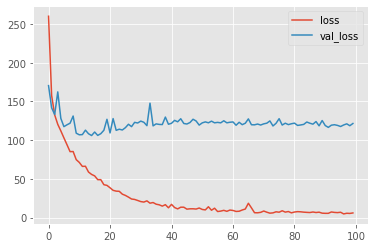

In [17]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [18]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

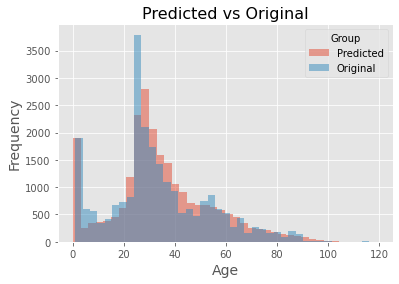

In [19]:
pd.Series(y_pred.reshape((len(y_pred)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

### Predictions for best model

In [34]:
import os
path = os.getcwd() + r'\checkpoints\my_best_model.epoch15-loss106.01.hdf5'

In [35]:
best_model = tf.keras.models.load_model(path)

In [36]:
y_pred_best = best_model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

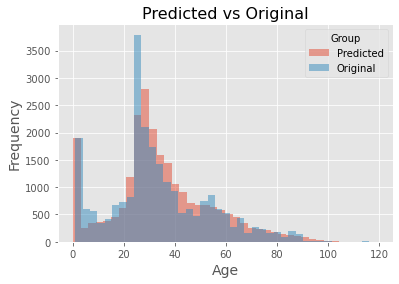

In [37]:
pd.Series(y_pred.reshape((len(y_pred_best)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)